In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Stats
from scipy.stats import boxcox
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode
from scipy.special import boxcox1p,inv_boxcox1p
from scipy.special import inv_boxcox
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("./Data/usedCleanedPre.csv")
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

In [41]:
df

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga motora,Cena,EKM,Pogon,Menjac,Klima,Boja,Materijal enterijera,prosek_god_km,Starost,Km_cat
0,BMW,116,2015,194000,Hecbek,Dizel,1.5,115,10900.000000,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Plava,Stof,32333.333333,6,190000-200000
1,BMW,116,2015,176000,Hecbek,Dizel,1.5,115,10990.000000,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Crna,Stof,29333.333333,6,170000-180000
2,BMW,116,2015,197000,Hecbek,Dizel,1.5,115,10290.000000,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Plava,Stof,32833.333333,6,190000-200000
3,BMW,116,2016,141000,Hecbek,Dizel,1.5,115,12900.000000,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,28200.000000,5,140000-150000
4,BMW,116,2015,250000,Hecbek,Dizel,1.5,115,10500.000000,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,41666.666667,6,250000-260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26621,Opel,Zafira,2015,187916,MiniVan,Dizel,1.6,135,8503.423953,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Siva,Prirodna koza,31319.333333,6,180000-190000
26622,Opel,Zafira,2015,184290,MiniVan,Dizel,1.6,135,8990.000000,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Siva,Prirodna koza,30715.000000,6,180000-190000
26623,Opel,Zafira,2015,164116,MiniVan,Dizel,1.6,135,9250.000000,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Plava,Prirodna koza,27352.666667,6,160000-170000
26624,Opel,Zafira,2015,164965,MiniVan,Dizel,1.6,135,8763.423953,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Plava,Prirodna koza,27494.166667,6,160000-170000


<AxesSubplot:xlabel='Cena', ylabel='Density'>

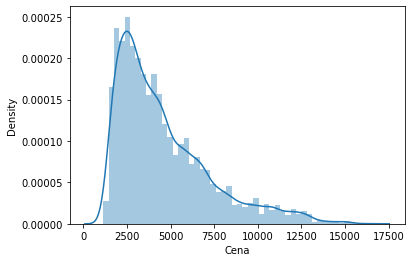

In [42]:
sns.distplot(df['Cena'])

In [43]:
print("{0} skew : ".format('Cena'), skew(df['Cena']))

Cena skew :  1.2999506961126273


Lambda value used for Transformation: -0.18829260545282225


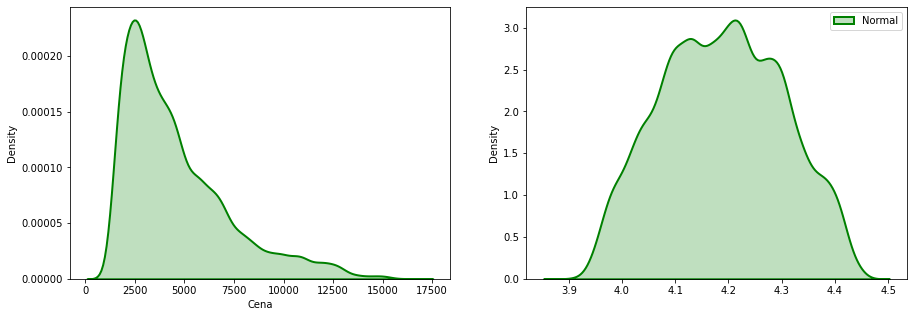

In [44]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(df['Cena'])
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(df['Cena'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(15)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

mu = 4575.147532564618 and sigma = 2673.7325032140648


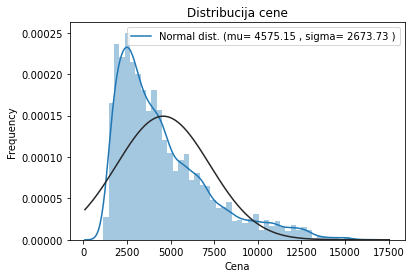

In [45]:
(mu, sigma) = norm.fit(df['Cena'])

# 1. Plot Price
sns.distplot(df['Cena'], fit=norm);
plt.ylabel('Frequency')
plt.title('Distribucija cene')
plt.legend(['Normal dist. (mu= {:.2f} , sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu = {} and sigma = {}'.format(mu, sigma))

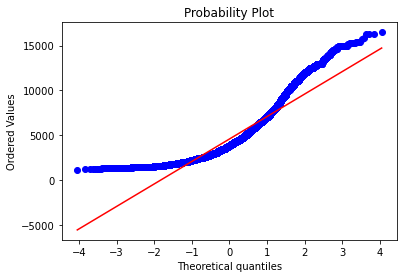

In [46]:
# Before transfortmation
fig = plt.figure()
res = stats.probplot(df['Cena'], plot=plt)
plt.show()

In [47]:
#applying box-cox transformation to remove skewness and converting it to normal distribution
price_box,lam_price= boxcox(df['Cena'])
df['Cena'] = price_box

mu_boxcox = 4.19 and sigma_boxcox = 0.11


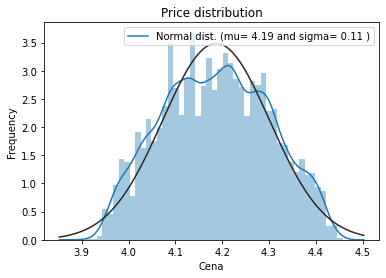

In [48]:
(mu, sigma) = norm.fit(df['Cena'])

# 1. Plot Price
sns.distplot(df['Cena'], fit=norm);
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu_boxcox = {:.2f} and sigma_boxcox = {:.2f}'.format(mu, sigma))

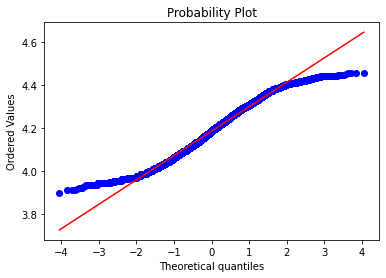

In [49]:
# After the transformation
fig = plt.figure()
res = stats.probplot(df['Cena'], plot=plt)
plt.show()

In [50]:
print("{0} skew : ".format('Cena'), skew(df['Cena']))

Cena skew :  0.02705229019887383


In [51]:
df

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga motora,Cena,EKM,Pogon,Menjac,Klima,Boja,Materijal enterijera,prosek_god_km,Starost,Km_cat
0,BMW,116,2015,194000,Hecbek,Dizel,1.5,115,4.388420,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Plava,Stof,32333.333333,6,190000-200000
1,BMW,116,2015,176000,Hecbek,Dizel,1.5,115,4.389847,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Crna,Stof,29333.333333,6,170000-180000
2,BMW,116,2015,197000,Hecbek,Dizel,1.5,115,4.378362,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Plava,Stof,32833.333333,6,190000-200000
3,BMW,116,2016,141000,Hecbek,Dizel,1.5,115,4.417221,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,28200.000000,5,140000-150000
4,BMW,116,2015,250000,Hecbek,Dizel,1.5,115,4.381903,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,41666.666667,6,250000-260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26621,Opel,Zafira,2015,187916,MiniVan,Dizel,1.6,135,4.344269,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Siva,Prirodna koza,31319.333333,6,180000-190000
26622,Opel,Zafira,2015,184290,MiniVan,Dizel,1.6,135,4.354343,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Siva,Prirodna koza,30715.000000,6,180000-190000
26623,Opel,Zafira,2015,164116,MiniVan,Dizel,1.6,135,4.359465,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Plava,Prirodna koza,27352.666667,6,160000-170000
26624,Opel,Zafira,2015,164965,MiniVan,Dizel,1.6,135,4.349735,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Plava,Prirodna koza,27494.166667,6,160000-170000


In [52]:
#df.drop(columns = ['sin_odo', 'sin_age'], inplace=True)

In [53]:
#df.to_csv('./Data/usedCleaned2021V.csv', index=False)

In [54]:
# New Variable prosek kilometraze po godini

In [55]:
#df['prosek_god_km']=df['Kilometraza']/(2021 - df['Godiste'])
#df['Starost'] = 2021-df['Godiste']

mu = 16735.554732393022 and sigma = 6002.4240301704685


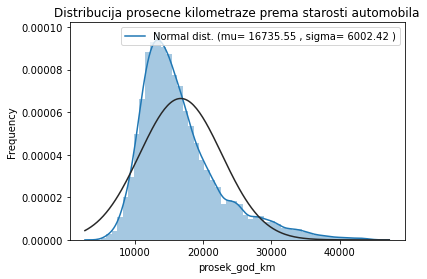

In [56]:
(mu, sigma) = norm.fit(df['prosek_god_km'])

# 1. Plot Price
sns.distplot(df['prosek_god_km'], fit=norm);
plt.ylabel('Frequency')
plt.title('Distribucija prosecne kilometraze prema starosti automobila')
plt.legend(['Normal dist. (mu= {:.2f} , sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu = {} and sigma = {}'.format(mu, sigma))

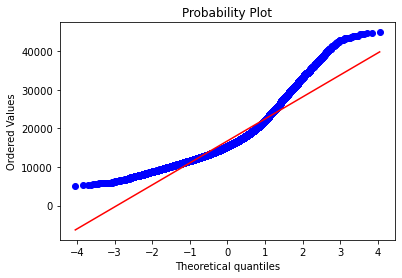

In [57]:
# Before transfortmation
fig = plt.figure()
res = stats.probplot(df['prosek_god_km'], plot=plt)
plt.show()

In [58]:
#applying box-cox transformation to remove skewness and converting it to normal distribution
prosek_box,lam_avg_km= boxcox(df['prosek_god_km'])
df['prosek_god_km'] = prosek_box

mu_boxcox = 2.56 and sigma_boxcox = 0.01


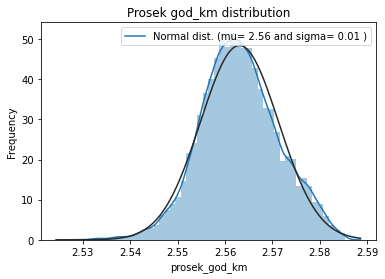

In [59]:
(mu, sigma) = norm.fit(df['prosek_god_km'])

# 1. Plot Price
sns.distplot(df['prosek_god_km'], fit=norm);
plt.ylabel('Frequency')
plt.title('Prosek god_km distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu_boxcox = {:.2f} and sigma_boxcox = {:.2f}'.format(mu, sigma))

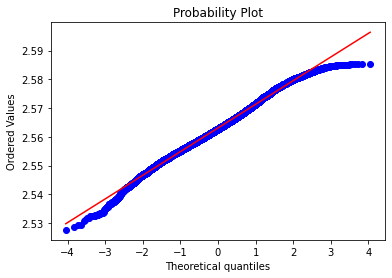

In [60]:
# After transfortmation
fig = plt.figure()
res = stats.probplot(df['prosek_god_km'], plot=plt)
plt.show()

In [61]:
df

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga motora,Cena,EKM,Pogon,Menjac,Klima,Boja,Materijal enterijera,prosek_god_km,Starost,Km_cat
0,BMW,116,2015,194000,Hecbek,Dizel,1.5,115,4.388420,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Plava,Stof,2.579437,6,190000-200000
1,BMW,116,2015,176000,Hecbek,Dizel,1.5,115,4.389847,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Crna,Stof,2.577523,6,170000-180000
2,BMW,116,2015,197000,Hecbek,Dizel,1.5,115,4.378362,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Plava,Stof,2.579732,6,190000-200000
3,BMW,116,2016,141000,Hecbek,Dizel,1.5,115,4.417221,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,2.576728,5,140000-150000
4,BMW,116,2015,250000,Hecbek,Dizel,1.5,115,4.381903,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,2.584101,6,250000-260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26621,Opel,Zafira,2015,187916,MiniVan,Dizel,1.6,135,4.344269,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Siva,Prirodna koza,2.578818,6,180000-190000
26622,Opel,Zafira,2015,184290,MiniVan,Dizel,1.6,135,4.354343,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Siva,Prirodna koza,2.578436,6,180000-190000
26623,Opel,Zafira,2015,164116,MiniVan,Dizel,1.6,135,4.359465,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Plava,Prirodna koza,2.576104,6,160000-170000
26624,Opel,Zafira,2015,164965,MiniVan,Dizel,1.6,135,4.349735,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Plava,Prirodna koza,2.576210,6,160000-170000


In [88]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#df_enc = pd.read_csv("./Data/usedCleaned2021.csv")
df_enc = df
X_t =  df_enc.drop(columns=['Cena', 'Godiste', 'Kilometraza'])
Y_t = df_enc['Cena']

df_enc = pd.get_dummies(df_enc)
X =  df_enc.drop(columns=['Cena', 'Godiste', 'Kilometraza'])
Y = df_enc['Cena']


X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.3,
                                                   random_state=0)
X_train_t, X_test_t, y_train_t, y_test_t =train_test_split(X_t,Y_t,
                                                   test_size=0.3,
                                                   random_state=0)

In [89]:
X_t

,Marka,Model,Karoserija,Gorivo,Kubikaza,Snaga motora,EKM,Pogon,Menjac,Klima,Boja,Materijal enterijera,prosek_god_km,Starost,Km_cat
0,BMW,116,Hecbek,Dizel,1.5,115,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Plava,Stof,32333.333333,6,190000-200000
1,BMW,116,Hecbek,Dizel,1.5,115,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Crna,Stof,29333.333333,6,170000-180000
2,BMW,116,Hecbek,Dizel,1.5,115,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Plava,Stof,32833.333333,6,190000-200000
3,BMW,116,Hecbek,Dizel,1.5,115,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,28200.000000,5,140000-150000
4,BMW,116,Hecbek,Dizel,1.5,115,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,41666.666667,6,250000-260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26621,Opel,Zafira,MiniVan,Dizel,1.6,135,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Siva,Prirodna koza,31319.333333,6,180000-190000
26622,Opel,Zafira,MiniVan,Dizel,1.6,135,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Siva,Prirodna koza,30715.000000,6,180000-190000
26623,Opel,Zafira,MiniVan,Dizel,1.6,135,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Plava,Prirodna koza,27352.666667,6,160000-170000
26624,Opel,Zafira,MiniVan,Dizel,1.6,135,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Plava,Prirodna koza,27494.166667,6,160000-170000


In [90]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import catboost as cb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)


In [91]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [66]:
# model
model = XGBRegressor()

# A parameter grid for XGBoost
hyperparameters = {
        'gamma':[i/10.0 for i in range(0,4)],
        'n_estimators':range(200,1001,200),
        'max_depth':range(4,12,2),
        'min_child_weight':[4,6,8,10],
        'subsample':[i/100.0 for i in range(75,100,5)],
        'colsample_bytree':[i/100.0 for i in range(65,90,5)]
        }
print('*'*30)
print('XGBRegressor')
print('*'*30)
#XGB_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
#Prediction_XGB = XGB_RandSearch.BestModelPridict(X_test)

******************************
XGBRegressor
******************************


In [92]:
param = {'subsample': 0.95, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 10, 'gamma': 0.0, 'colsample_bytree': 0.7}
model1 = XGBRegressor(**param)#**param

In [93]:
model1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.95,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
predictions = model1.predict(X_test)
#y_test= inv_boxcox(y_test,lam_price)
#predictions = inv_boxcox(predictions,lam_price)

In [95]:
MAE = (mean_absolute_error(y_test, predictions))
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print('MAE: {:.2f}'.format(MAE))
print('RMSE: {:.2f}'.format(RMSE))
print('R2: {:.2f}'.format(r2))

MAE: 212.81
RMSE: 318.66
R2: 0.99


In [71]:
# model
model = LGBMRegressor()
hyperparameters = {
    'n_estimators':range(200, 801,200),
    'num_leaves': [60, 80, 120],
    'reg_alpha': [0.1, 0.3, 0.5 ],
    'min_data_in_leaf': [30, 50, 70],
    'lambda_l1': [0, 1, 1.5]
    }
print('*'*30)
print('LGBMRegressor')
print('*'*30)
#LGBM_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
#Prediction_LGBM = LGBM_RandSearch.BestModelPridict(X_test)

******************************
LGBMRegressor
******************************


In [96]:
param = {'reg_alpha': 0.3, 'num_leaves': 120, 'n_estimators': 800, 'min_data_in_leaf': 50, 'lambda_l1': 0}
model2 = LGBMRegressor(**param)
model2.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.3 will be ignored. Current value: lambda_l1=0


LGBMRegressor(lambda_l1=0, min_data_in_leaf=50, n_estimators=800,
              num_leaves=120, reg_alpha=0.3)

In [97]:
model2.fit(X_train, y_train)

LGBMRegressor(lambda_l1=0, min_data_in_leaf=50, n_estimators=800,
              num_leaves=120, reg_alpha=0.3)

In [99]:
predictions = model2.predict(X_test)
#y_test= inv_boxcox(y_test,lam_price)
#predictions = inv_boxcox(predictions,lam_price)

MAE = (mean_absolute_error(y_test, predictions))
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print('MAE: {:.2f}'.format(MAE))
print('RMSE: {:.2f}'.format(RMSE))
print('R2: {:.2f}'.format(r2))

MAE: 210.02
RMSE: 302.22
R2: 0.99


In [75]:
#model = cb.CatBoostRegressor(loss_function='MAE')

In [76]:
hyperparameters = {'iterations': [400, 600, 800, 1000],
        'learning_rate': [0.1, 0.1, 0.09, 0.8],
        'depth': [4, 6, 8, 10],
        'l2_leaf_reg': [1, 3, 5],
                  }
#model.randomized_search(hyperparameters, train_dataset)

In [77]:
#hyperparameters = {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 1000, 'depth': 10}
#model = cb.CatBoostRegressor(**hyperparameters)

In [78]:
#model.fit(train_dataset)

In [79]:
#predictions = model.predict(test_dataset)
#y_test= inv_boxcox(y_test,lam_price)
#predictions = inv_boxcox(predictions,lam_price)

MAE = (mean_absolute_error(y_test, predictions))
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print('MAE: {:.2f}'.format(MAE))
print('RMSE: {:.2f}'.format(RMSE))
print('R2: {:.2f}'.format(r2))

MAE: 213.11
RMSE: 310.71
R2: 0.99


In [100]:
import pickle
with open('./models/xg_model.pkl', 'wb') as files:
    pickle.dump(model1, files)
with open('./models/lg_model.pkl', 'wb') as files:
    pickle.dump(model2, files)

In [26]:
lam_price

-0.18829260545282225

In [27]:
lam_avg_km

-0.38020162182547906

In [28]:
with open('./models/cb_model.pkl', 'wb') as files:
    pickle.dump(model, files)

In [29]:
pd.DataFrame({'feature_importance': model.get_feature_importance(train_dataset), 
              'feature_names': X_train.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

,feature_importance,feature_names
3,3.887611e+01,Starost
5,5.705685e+00,Marka_Audi
1,5.433538e+00,Snaga motora
113,5.421494e+00,EKM_Euro 4
117,4.940646e+00,Pogon_Prednji
...,...,...
135,5.445848e-04,Km_cat_100000-110000
100,9.026554e-05,Model_X3
157,4.633230e-07,Km_cat_80000-90000
136,0.000000e+00,Km_cat_110000-120000


In [30]:
X_train

,Kubikaza,Snaga motora,prosek_god_km,Starost,Marka_Alfa Romeo,Marka_Audi,Marka_BMW,Marka_Citroen,Marka_Fiat,Marka_Ford,...,Km_cat_240000-250000,Km_cat_250000-260000,Km_cat_260000-270000,Km_cat_270000-280000,Km_cat_280000-290000,Km_cat_290000-300000,Km_cat_300000-310000,Km_cat_310000-320000,Km_cat_80000-90000,Km_cat_90000-100000
8611,2.0,160,2.568245,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10312,2.0,140,2.570603,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12861,1.4,75,2.559766,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5361,1.6,110,2.568222,11,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13549,1.6,135,2.562629,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1.6,75,2.574584,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19648,1.4,100,2.552708,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,1.2,60,2.559941,16,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10799,1.4,75,2.554083,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df_out = X_test_t
df_out['Cena_actual'] = y_test
df_out['Cena_predicted'] = predictions

In [102]:
df_out['MAE'] = abs(df_out['Cena_actual']-df_out['Cena_predicted'])

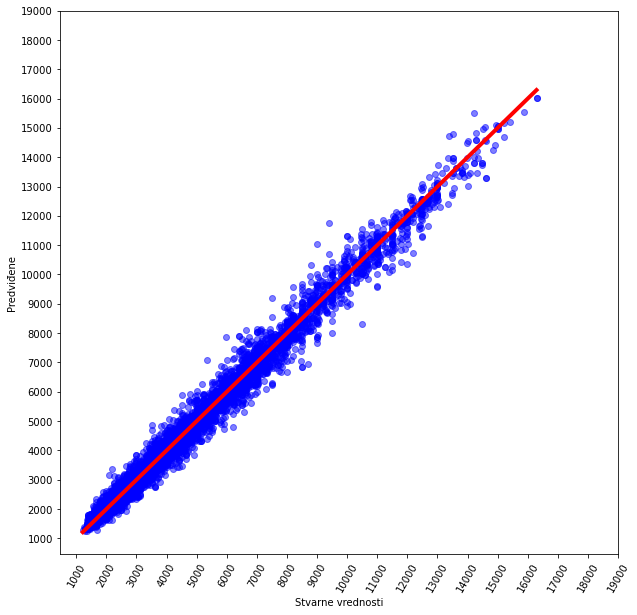

In [103]:
#Plot Real vs Predict

plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, color='blue', edgecolors=(0, 0, 1),alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4,color='Red')
plt.xlabel('Stvarne vrednosti')
plt.xticks(np.arange(1000, 20000, 1000), rotation=60)
plt.yticks(np.arange(1000, 20000, 1000))
plt.ylabel('Predviđene')
plt.show()

In [104]:
df_out[df_out['MAE']>500]

,Marka,Model,Karoserija,Gorivo,Kubikaza,Snaga motora,EKM,Pogon,Menjac,Klima,Boja,Materijal enterijera,prosek_god_km,Starost,Km_cat,Cena_actual,Cena_predicted,MAE
3442,Audi,A4,Karavan,Dizel,2.0,175,Euro 5,Prednji,Automatski / poluautomatski,Automatska klima,Crna,Stof,35285.714286,7,240000-250000,12100.000000,12689.265615,589.265615
18965,Renault,Clio,Hecbek,Dizel,1.5,75,Euro 5,Prednji,Manuelni 5 brzina,Manuelna klima,Bela,Stof,36410.500000,6,210000-220000,7391.917821,6771.361083,620.556738
14821,Peugeot,508,Limuzina,Dizel,1.6,120,Euro 5,Prednji,Automatski / poluautomatski,Automatska klima,Siva,Stof,29074.500000,6,170000-180000,9658.822118,10259.777057,600.954938
9569,Skoda,Octavia,Hecbek,Benzin + Gas (TNG),1.4,75,Euro 4,Prednji,Manuelni 5 brzina,Automatska klima,Siva,Stof,16666.666667,18,300000-310000,1900.000000,2426.255276,526.255276
4348,Opel,Astra J,Karavan,Dizel,1.6,110,Euro 6,Prednji,Manuelni 6 brzina,Automatska klima,Druga,Kombinovana koza,35650.000000,5,170000-180000,6700.000000,7305.222419,605.222419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7538,Volkswagen,Golf 5,Hecbek,Benzin,2.0,150,Euro 4,4x4,Manuelni 6 brzina,Manuelna klima,Crna,Stof,10812.500000,16,170000-180000,3500.000000,4335.764677,835.764677
14252,BMW,320,Limuzina,Dizel,2.0,150,Euro 3,Zadnji,Manuelni 5 brzina,Automatska klima,Crna,Stof,13530.210526,19,250000-260000,2277.305794,2781.580750,504.274956
22601,Renault,Megane,Hecbek,Dizel,1.5,110,Euro 5,Prednji,Manuelni 6 brzina,Manuelna klima,Bela,Stof,26047.714286,7,180000-190000,6950.000000,6250.545403,699.454597
8011,Volkswagen,Golf 7,Hecbek,Dizel,1.6,110,Euro 6,Prednji,Manuelni 5 brzina,Manuelna klima,Crna,Stof,43400.000000,5,210000-220000,9990.000000,11301.180628,1311.180628
